# k-Nearest Neighbor

1) Implement the k-Nearest Neighbor algorithm with Python!
2) It should be applicable for classification and regression tasks!
3) Extend your algorithm with a weighting function (see the lecture slides)

In [7]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

In [8]:
# YOUR CODE HERE
class KNNFramework:
    n_neighbors = None
    database = None
    
    def __init__(self, n_neighbors:int = 3) -> None:
        self.n_neighbors = n_neighbors
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.database = pd.DataFrame(np.append(X, y, axis=1))
        return self
    
    def getDB(self) -> pd.DataFrame:
        return self.database
    
    def euclideanDist(self, x: np.ndarray, y: np.ndarray, axis=None) -> float:
        return np.sqrt(np.sum((np.array(x) - np.array(y)) ** 2))
    
    def calculateNeighbors(self, X) -> pd.DataFrame:
        neighbor_database = self.database.copy()
        neighbor_database["Dist"] = pd.Series([self.euclideanDist(X, x) for x in neighbor_database.values[:,:-1]])
        
        sorted_database = neighbor_database.sort_values(by="Dist", ascending=True).iloc[:self.n_neighbors]

        # weighting neighbors by distances
        sum_dist = np.sum(1/np.array(sorted_database["Dist"]))
        sorted_database["Dist"] = sorted_database["Dist"].apply(lambda x: (1/x)/sum_dist)

        return sorted_database
    
    def predict_classification(self, X) -> int:
            pred = []
            for i in X:
                neighbor_db = self.calculateNeighbors(i)
                probabilities = np.array([0] * len(np.unique(self.database[self.database.columns[-1]]))).astype(np.float32)
                for row in neighbor_db.values[:,-2:]:
                    probabilities[int(row[0])] += (1 * row[1])
                pred.append(np.argmax(probabilities))
            return pred
        
    def predict_regression(self, X) -> int:
        pred = []
        for i in X:
            neighbor_db = self.calculateNeighbors(i)
            pred.append(np.sum(np.array(neighbor_db[neighbor_db.columns[-2]]) * np.array(neighbor_db["Dist"])))
        return pred

## Compare the results with the sklearn kNN algorithm

In [9]:
# Make your code work with the following inputs:
# Use this data as your reference data points and labels

# Classification data
cl_X = np.arange(0, 9).reshape(9,1)
cl_y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
# print('Classification input:\n', X, '\tShape:', cl_X.shape)
# print('Classification labels:\n', y, '\tShape:', cl_y.shape)


# Regression data
r_X = np.array([[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]])
r_y = np.array([1, 2, 3, 4, 5])
# print('Regression input:\n', r_X, '\tShape:', r_X.shape)
# print('Regression labels:\n', r_y, '\tShape:', r_y.shape)


# Use the following list to test your code for classification
cl_X_test = np.array([[2.1], [5.2], [7.2]])

r_X_test = np.array([[2.1, 5.1], [2.6, 6.2]])

Test Points: [[2.1], [5.2], [7.2]]
Custom Classifier Predictions: [0, 1, 2]
Sklearn Classifier Predictions: [0, 1, 2]

Accuracy: 100.0%


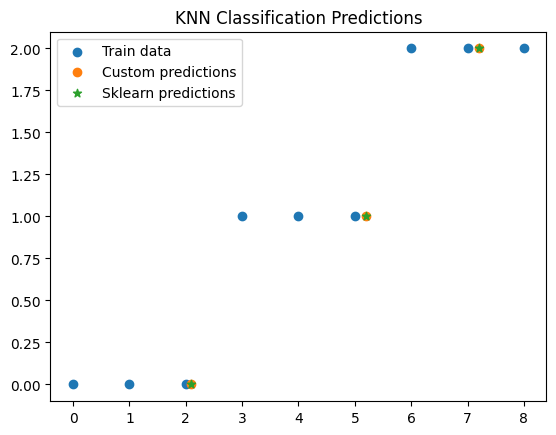

In [13]:
# classification (dont forget the weighting function)

# yours
model = KNNFramework(n_neighbors=3).fit(cl_X, cl_y.reshape(-1,1))
pred_custom = model.predict_classification(cl_X_test)


# sklearn comparison
model = KNeighborsClassifier(n_neighbors=3, metric="euclidean", weights="distance").fit(cl_X, cl_y)
pred_sklearn = model.predict(cl_X_test)

print(f"Test Points: {cl_X_test.tolist()}\nCustom Classifier Predictions: {pred_custom}\nSklearn Classifier Predictions: {pred_sklearn.tolist()}")

plt.title("KNN Classification Predictions")
plt.scatter(cl_X, cl_y, label="Train data")
plt.scatter(cl_X_test, pred_custom, label="Custom predictions")
plt.scatter(cl_X_test, pred_sklearn, label="Sklearn predictions", marker="*")
plt.legend()
print()
print(f"Accuracy: {accuracy_score(pred_custom, pred_sklearn) * 100}%")

In [11]:
# regression (dont forget the weighting function)
# yours
model = KNNFramework(n_neighbors=3).fit(r_X, r_y.reshape(-1, 1))
pred_custom = model.predict_regression(r_X_test)

# sklearn comparison
model = KNeighborsRegressor(n_neighbors=3, metric="euclidean", weights="distance").fit(r_X, r_y)
pred_sklearn = model.predict(r_X_test)

print(f"Test Points: {r_X_test.tolist()}\nCustom Classifier Predictions: {pred_custom}\nSklearn Classifier Predictions: {pred_sklearn.tolist()}")
print()
print(f"R2: {np.sqrt(r2_score(pred_custom, pred_sklearn))}")
print(f"RMSE: {np.sqrt(mean_squared_error(pred_custom, pred_sklearn))}")
print(f"MAPE: {np.sqrt(mean_absolute_percentage_error(pred_custom, pred_sklearn))}")

Test Points: [[2.1, 5.1], [2.6, 6.2]]
Custom Classifier Predictions: [2.2414313013431406, 3.0]
Sklearn Classifier Predictions: [2.2414313013431406, 3.0]

R2: 1.0
RMSE: 0.0
MAPE: 0.0


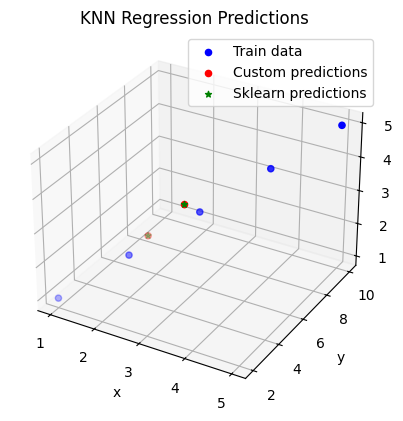

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_X[:, 0], r_X[:, 1], r_y, c='blue', label='Train data')

ax.scatter(r_X_test[:, 0], r_X_test[:, 1], pred_custom, c='red', marker='o', label='Custom predictions')
ax.scatter(r_X_test[:, 0], r_X_test[:, 1], pred_sklearn, c='green', marker='*', label='Sklearn predictions')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('KNN Regression Predictions')
ax.legend()

plt.show()
